In [1]:
import numpy as np
from keras import datasets
from keras.utils import np_utils

이미지 분류에 대한 딥러닝에 대한 노트북입니다.

데이터를 먼저 살펴보고 로딩하겠습니다.

![cifar10](img/cifar-10_labels.png)

In [2]:
(train_X, train_Y), (test_X, test_Y) = datasets.cifar10.load_data()
    

170500096/170498071 [==============================] - 70s 0us/step


In [5]:
def show_data(X, Y):
    print('Shape of X : {}'.format(X.shape))
    print('Shape of Y: {}'.format(Y.shape))
    print(X[0])
    print(Y[0])

In [6]:
show_data(train_X, train_Y)

Shape of X : (50000, 32, 32, 3)
Shape of Y: (50000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]


데이터를 살펴보니 5만개의 데이터가 있고 32 픽셀 x 32 픽셀 크기의 이미지 데이터이고 RGB 각각의 명암이 0 에서 255 사이의 정수로 표현된 데이터 같습니다. 타겟 데이터(Y) 는 하나의 정수값을 같는 것으로 보아 이미지 종류의 레이블을 저장하고 있는 데이터 인 것 같습니다.

Y 가 몇 개의 분류 값을 갖는지 알아보겠습니다.

In [9]:
import numpy as np

np.unique(train_Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

0 부터 9 까지의 10개의 레이블을 갖고 있는 것을 확인했습니다.

데이터에 대해서 알아봤으니 다음 과정을 함수로 정의하겠습니다.

- 데이터 로딩(load_data)
- 레이블 데이터를 원핫인코딩하기(to_categorical)
- 입력 데이터를 1차원 배열로 만들기(reshap)
- 입력 데이터를 정규화하기(MinMaxScaler, StandardScalder)

In [24]:
def prepare_classification_data(train_data, test_data):
    train_X, train_Y = train_data
    test_X,  test_Y = test_data
    # One-hot encoding
    train_Y = np_utils.to_categorical(train_Y)
    test_Y  = np_utils.to_categorical(test_Y)
    
    # reshaping input data
    m, W, H, C = train_X.shape
    train_X = train_X.reshape(-1, W*H*C)
    test_X  = test_X.reshape(-1, W*H*C)
    
    # Normalization
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler().fit(test_X)
    train_X = scaler.transform(train_X)
    test_X  = scaler.transform(test_X)
    
    return (train_X, train_Y), (test_X, test_Y)

In [26]:
train_data, test_data = datasets.cifar10.load_data()

(train_X, train_Y), (test_X, test_Y) = prepare_classification_data(train_data, test_data)

/home/rk/dev/env/ml/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


첫 번째 데이터를 살펴보고 원하는대로 전처리가 되었는지 확인해봅니다.

In [30]:
train_X[0], train_Y[0]

(array([-0.97553309, -1.01870231, -0.87145718, ..., -0.05492909,
        -0.5482677 , -0.6598775 ]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]))

## 신경망 클래스 만들기

앞선 두 노트북에서 신경망 모델을 만드는 과정이 반복됩니다.  클래스로 만들어서 사용하는 것이 더 편해보입니다.

In [31]:
from keras.models import Sequential
from keras.layers import Dense

In [49]:
class DNN(Sequential):
    def __init__(self, input_size, output_size, *num_hidden_nodes ):
        super().__init__()
        num_nodes = (*num_hidden_nodes, output_size)
        
        for idx, num_node in enumerate(num_nodes):
            activation = 'relu'
            if idx == 0:
                self.add(Dense(num_node, activation=activation, input_shape=(input_size,)))
            else:
                if idx == len(num_nodes) - 1:
                    activation = 'softmax'
                self.add(Dense(output_size, activation=activation))
            
        self.compile(loss='categorical_crossentropy',
                           optimizer='adam',
                           metrics=['accuracy'])
                

## 신경망 훈련시키기

In [56]:
model2 = DNN(train_X.shape[1], train_Y.shape[1], 256)

history2 = model2.fit(train_X, train_Y, epochs=10, batch_size=100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 25s 616us/step - loss: 2.1017 - acc: 0.3760 - val_loss: 1.7282 - val_acc: 0.4277
Epoch 2/10
40000/40000 [==============================] - 24s 603us/step - loss: 1.5505 - acc: 0.4821 - val_loss: 1.6533 - val_acc: 0.4488
Epoch 3/10
40000/40000 [==============================] - 24s 608us/step - loss: 1.3793 - acc: 0.5268 - val_loss: 1.5443 - val_acc: 0.4840
Epoch 4/10
40000/40000 [==============================] - 24s 605us/step - loss: 1.2952 - acc: 0.5534 - val_loss: 1.5113 - val_acc: 0.4932
Epoch 5/10
40000/40000 [==============================] - 24s 606us/step - loss: 1.2462 - acc: 0.5682 - val_loss: 1.5426 - val_acc: 0.4923
Epoch 6/10
40000/40000 [==============================] - 24s 594us/step - loss: 1.1897 - acc: 0.5901 - val_loss: 1.5150 - val_acc: 0.4980
Epoch 7/10
40000/40000 [==============================] - 25s 628us/step - loss: 1.1550 - acc: 0.6012 - val_loss: 1.

테스트 데이터에 대해서 정확도 0.49 가 나왔습니다.  히든레이어의 크기를  늘려보겠습니다.



In [58]:
model = DNN(train_X.shape[1], train_Y.shape[1], 512)
history = model.fit(train_X, train_Y, epochs=10, batch_size=100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 42s 1ms/step - loss: 2.3148 - acc: 0.3760 - val_loss: 1.7687 - val_acc: 0.4249
Epoch 2/10
40000/40000 [==============================] - 42s 1ms/step - loss: 1.5598 - acc: 0.4786 - val_loss: 1.5862 - val_acc: 0.4637
Epoch 3/10
40000/40000 [==============================] - 43s 1ms/step - loss: 1.3583 - acc: 0.5312 - val_loss: 1.5577 - val_acc: 0.4725
Epoch 4/10
40000/40000 [==============================] - 43s 1ms/step - loss: 1.2974 - acc: 0.5550 - val_loss: 1.5392 - val_acc: 0.4833
Epoch 5/10
40000/40000 [==============================] - 43s 1ms/step - loss: 1.2460 - acc: 0.5724 - val_loss: 1.5548 - val_acc: 0.4839
Epoch 6/10
40000/40000 [==============================] - 43s 1ms/step - loss: 1.2147 - acc: 0.5842 - val_loss: 1.6236 - val_acc: 0.4840
Epoch 7/10
40000/40000 [==============================] - 42s 1ms/step - loss: 1.1649 - acc: 0.6015 - val_loss: 1.6464 - val_acc

단일 하든 레이어의 크기를 늘리는 것은 의미가 없다고 판단할 수 있겠습니다.

정확도 0.49 보다 더 높일 수 있는 신경망을 구성해보면 어떨까요?

In [59]:
model.evaluate(test_X, test_Y)

10000/10000 [==============================] - 4s 448us/step


[1.665752331161499, 0.4887]

In [63]:
predicted_Y = model.predict_classes(test_X)

In [65]:
target_Y = np.argmax(test_Y, axis=1)

In [67]:
match = predicted_Y == target_Y
match[:10]

array([ True, False, False,  True, False,  True, False,  True,  True,
        True])

In [69]:
sum(match) / len(match)

0.4887

In [72]:
wrong_label = np.where(match==False)

In [73]:
import matplotlib.pyplot as plt

In [74]:
plt.show(test_X[wrong_label[0]].reshape(32, 32, 3))

ValueError: cannot reshape array of size 15707136 into shape (32,32,3)

In [76]:
len(test_X[1])

3072

In [78]:
test_X[1].reshape(32,32,3)[0]

array([[1.42459082, 1.36137256, 1.27505056],
       [1.39523197, 1.33108784, 1.24736035],
       [1.39524328, 1.33092908, 1.24754579],
       [1.3919652 , 1.32773802, 1.24357264],
       [1.38906802, 1.32505174, 1.2418087 ],
       [1.38275937, 1.31857344, 1.23759365],
       [1.37842177, 1.31655606, 1.23560444],
       [1.36875849, 1.30971712, 1.23025463],
       [1.36312671, 1.30590832, 1.22727466],
       [1.35619457, 1.29946908, 1.22227862],
       [1.36351431, 1.30818199, 1.23107345],
       [1.35833969, 1.30512483, 1.22989358],
       [1.35864695, 1.30641856, 1.23166239],
       [1.36180537, 1.30984913, 1.23426878],
       [1.36007   , 1.30831252, 1.23219871],
       [1.36026142, 1.2946724 , 1.23248467],
       [1.3594431 , 1.27918208, 1.23033379],
       [1.34353149, 1.27751965, 1.22925864],
       [1.33043844, 1.30678935, 1.22939011],
       [1.32129821, 1.31156571, 1.22034856],
       [1.35314984, 1.29940436, 1.2475983 ],
       [1.36182545, 1.29078344, 1.25235357],
       [1.

In [80]:
test_X[1].reshape(32,32,3).sum(axis=2).shape

(32, 32)

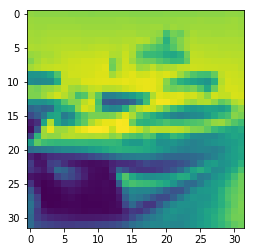

In [81]:
plt.imshow(test_X[1].reshape(32,32,3).sum(axis=2))
plt.show()

In [83]:
test_Y[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [109]:
predicted_Y[1]

1

In [85]:
from collections import defaultdict

In [99]:
def classify_by_label(target_Y, predicted_Y):
    n_classes = len(np.unique(target_Y))
    index_for_classes = [defaultdict(list) for _ in range(n_classes)]
    for idx, (target_y, predicted_y) in enumerate(zip(target_Y, predicted_Y)):
        if target_y == predicted_y:
            key = 'correct'
        else:
            key = 'wrong'
        index_for_classes[target_y][key].append(idx)
    return index_for_classes
    

In [100]:
index_for_classes = classify_by_label(target_Y, predicted_Y)


In [106]:
index_for_classes[8]['correct'][:10]

[15, 18, 55, 72, 73, 88, 92, 185, 196, 214]

In [107]:
def show_image(index):
    plt.imshow(test_X[index].reshape(32,32,3).sum(axis=2))
    plt.show()

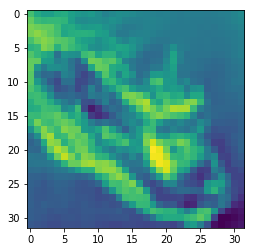

In [110]:
show_image(15)

In [111]:
index_for_classes[1]['correct'][:10]

[9, 37, 66, 81, 82, 104, 105, 114, 131, 134]

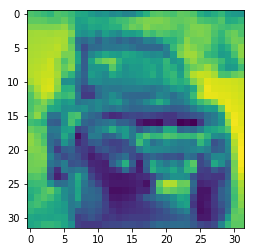

In [112]:
show_image(9)

테스트 데이터셋의 인덱스 1인 이미지는 배로 분류가 되었어야 했는데 자동자로 분류가된 것 같습니다.